<a href="https://colab.research.google.com/github/AnacletoLAB/grape/blob/main/tutorials/Ensmallen_Automatic_Graph_Retieval_KGOBO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensmallen Automatic Graph Retrieval - KGOBO
In this tutorial we will explore how to use the graphs that can be automatically retrieved by [Ensmallen](https://github.com/AnacletoLAB/ensmallen) from [OboFoundry](http://www.obofoundry.org/) through [Justin Reese](https://github.com/justaddcoffee) and [Harry Caufield](https://github.com/caufieldjh)'s [KGX](https://github.com/biolink/kgx)-based pipeline, [KG-OBO](https://github.com/Knowledge-Graph-Hub/kg-obo).

The graphs available are those that can be currently converted from the OBO format to KGX format, and will be downloaded from the [kg-obo website](https://kg-hub.berkeleybop.io/kg-obo/).

## Installing GRAPE
To install the [GRAPE library](https://github.com/AnacletoLAB/grape), as usual simply run:

```bash
pip install grape
```

In [2]:
!pip install -qU grape

## Which OBO graphs are available?
To get a list of all the OBO graphs currently available from Ensmallen, we can quickly get the dataframe with all of the graphs data and query it.

In [4]:
from grape.datasets import get_available_graphs_from_repository

In [6]:
get_available_graphs_from_repository("kgobo")

dict_keys(['MOD', 'FBBT', 'BTO', 'CHMO', 'OBA', 'PSO', 'OGSF', 'MCO', 'OPMI', 'FBDV', 'CEPH', 'MPATH', 'SPD', 'OMIT', 'VT', 'EHDAA2', 'FLOPO', 'WBLS', 'RXNO', 'OMP', 'ERO', 'GNO', 'XCO', 'AMPHX', 'EPIO', 'CLYH', 'OOSTT', 'FYPO', 'NCRO', 'IAO', 'GEO', 'EXO', 'SWO', 'OBCS', 'ENVO', 'SYMP', 'TAXRANK', 'APO', 'CLO', 'CMO', 'OHMI', 'HSO', 'FBBI', 'OBI', 'CDAO', 'MFMO', 'CRO', 'CHEMINF', 'MP', 'DUO', 'LABO', 'OLATDV', 'MPIO', 'CHEBI', 'AEO', 'ADO', 'FOBI', 'GENO', 'SBO', 'TO', 'UO', 'MOP', 'CHIRO', 'OGMS', 'NCBITAXON', 'FOODON', 'PW', 'FOVT', 'XPO', 'ZFS', 'RS', 'CTO', 'OMO', 'FIX', 'MAMO', 'VTO', 'UBERON', 'MFOMD', 'BFO', 'HTN', 'PORO', 'PROCO', 'AISM', 'WBBT', 'HAO', 'SO', 'RO', 'MONDO', 'DDPHENO', 'IDOMAL', 'MAXO', 'FBCV', 'TRANS', 'PSDO', 'SCDO', 'LEPAO', 'ONTONEO', 'DRON', 'RBO', 'NCIT', 'FMA', 'REX', 'COB', 'SIBO', 'PDRO', 'OGG', 'XLMOD', 'HANCESTRO', 'GO', 'MF', 'GSSO', 'UPHENO', 'PLANA', 'OAE', 'MMUSDV', 'MS', 'APOLLO_SV', 'HSAPDV', 'VO', 'MIRO', 'EMAPA', 'GECKO', 'CARO', 'GENEPIO', 

## How to load up a graph
To retrieve one of the available OBO graphs, as per any other repository, you can use:

In [7]:
from grape.datasets.kgobo import ZFS

In [8]:
graph = ZFS()

Let's get the graph report:

In [9]:
graph

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>ZFS</h2><p class="paragraph">The undirected graph ZFS has 77 homogeneous nodes and 149 heterogeneous edges. The graph contains 20 connected components (of which 15 are disconnected nodes), with the largest one containing 54 nodes and the smallest one containing a single node. The RAM requirements for the nodes and edges data structures are 9.05KB and 536B respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 0, the maximum node degree is 53, the mode degree is 4, the mean degree is 3.87 and the node degree median is 4.</p><p class="paragraph">The nodes with the highest degree centrality are <a href='http://purl.obolibrary.org/obo/ZFS_0100000' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0100000'>OBO:ZFS_0100000</a> (degree 53 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/ZFS_0000045' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000045'>OBO:ZFS_0000045</a> (degree 12 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/ZFS_0000048' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000048'>OBO:ZFS_0000048</a> (degree 10 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/ZFS_0000049' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000049'>OBO:ZFS_0000049</a> (degree 9 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>) and <a href='http://purl.obolibrary.org/obo/ZFS_0000047' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:ZFS_0000047'>OBO:ZFS_0000047</a> (degree 9 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has a single node type, which is <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>. The RAM requirement for the node types data structure is 4.31KB.</p><h4 style="margin: 1em 0 0 0;">Homogeneous node types</h4><p class="pa

## Some example operations on the graph
Here follows some examples of operations that can be executed on the graph object.

### How to easily find a method
The library includes a user recommender system to help you find any method, for instance suppose you want to compute the diameter and do not know the method name, or maybe are distracted and mistype it:

In [11]:
try:
    graph.djametr
except AttributeError as e:
    print(e)

The method 'djametr' does not exists, did you mean one of the following?
* 'get_diameter'
* 'get_diameter_naive'
* 'get_isomorphic_node_ids_groups'
* 'get_isomorphic_node_names_groups'
* 'get_number_of_isomorphic_node_groups'
* 'get_isomorphic_node_type_ids_groups'
* 'get_isomorphic_node_type_names_groups'
* 'get_number_of_isomorphic_node_type_groups'
* 'get_approximated_isomorphic_node_type_ids_groups'
* 'get_approximated_isomorphic_node_type_names_groups'


Additionally, generally speaking you can alway use the `dir` method to search for a method:

In [12]:
dir(graph)

['__and__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_repr_html_',
 'add_edge_type_name_inplace',
 'add_node_type_id_from_node_name_prefixes',
 'add_node_type_id_from_node_name_prefixes_inplace',
 'add_node_type_name_from_node_name_prefixes',
 'add_node_type_name_from_node_name_prefixes_inplace',
 'add_node_type_name_inplace',
 'add_selfloops',
 'approximated_vertex_cover_set',
 'are_nodes_remappable',
 'build_bipartite_graph_from_edge_node_ids',
 'build_bipartite_graph_from_edge_node_names',
 'build_bipartite_graph_from_edge_node_prefixes',
 'build_bipartite_graph_from_edge_node_types',
 

Finally, to see a method documentation you can use:

In [13]:
help(graph.get_node_degrees)

Help on built-in function get_node_degrees:

get_node_degrees() method of ensmallen.Graph instance
    Returns the unweighted degree of every node in the graph



### Enabling time-memory tradeoffs
The Ensmallen library includes a few time-memory tradeoffs that allow you to choose to spend more memory and get faster execution times. While we do not currently enable these by default because we do not know what you will be doing with the graph object, in most use cases (graphs within a few million nodes) they can be enabled without cornerns.

In [14]:
graph.enable()

### Diameter of the graph
Computing the diameter of the graph using [ifub](https://who.rocq.inria.fr/Laurent.Viennot/road/papers/ifub.pdf).

In [16]:
%%time
graph.get_diameter()

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 12.6 µs


2.0

### Connected components
Compute the connected components of the graph:

In [17]:
%%time
(component_ids, components_number, minimum_component_size, maximum_component_size) = graph.get_connected_components()

CPU times: user 0 ns, sys: 5.58 ms, total: 5.58 ms
Wall time: 2.27 ms


### Betweenness centrality
Compute efficiently the Betweenness centrality using the algorithm described in [Parallel Algorithms for Evaluating Centrality Indices in Real-world Networks](https://ieeexplore.ieee.org/document/1690659/).

In [18]:
%%time
graph.get_betweenness_centrality()

CPU times: user 0 ns, sys: 3.72 ms, total: 3.72 ms
Wall time: 1.94 ms


array([1.0500001e+01, 1.1913333e+03, 3.3333334e-01, 5.3333335e+00,
       3.3333334e-01, 3.3333334e-01, 3.3333334e-01, 8.3333337e-01,
       3.3333334e-01, 3.3333334e-01, 3.3333334e-01, 8.3333337e-01,
       8.3333337e-01, 3.3333334e-01, 8.3333337e-01, 3.3333334e-01,
       3.3333334e-01, 8.3333337e-01, 8.3333337e-01, 3.3333334e-01,
       3.3333334e-01, 8.3333337e-01, 3.3333334e-01, 3.3333334e-01,
       3.3333334e-01, 3.3333334e-01, 8.3333337e-01, 2.1666667e+00,
       8.3333337e-01, 8.3333337e-01, 1.0000000e+00, 3.3333334e-01,
       8.3333337e-01, 8.3333337e-01, 1.0000000e+00, 8.3333337e-01,
       3.3333334e-01, 1.3833333e+01, 8.3333337e-01, 3.3333334e-01,
       8.3333337e-01, 3.3333334e-01, 3.3333334e-01, 1.0500000e+01,
       0.0000000e+00, 3.3333334e-01, 7.1666670e+00, 0.0000000e+00,
       3.3333334e-01, 0.0000000e+00, 3.3333334e-01, 3.3333334e-01,
       2.2000002e+01, 3.3333334e-01, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

### Visualizing the graph
To visualize the graph using dot we can get help from the Embiggen submodule (which is already installed if you have installed from GraPE):

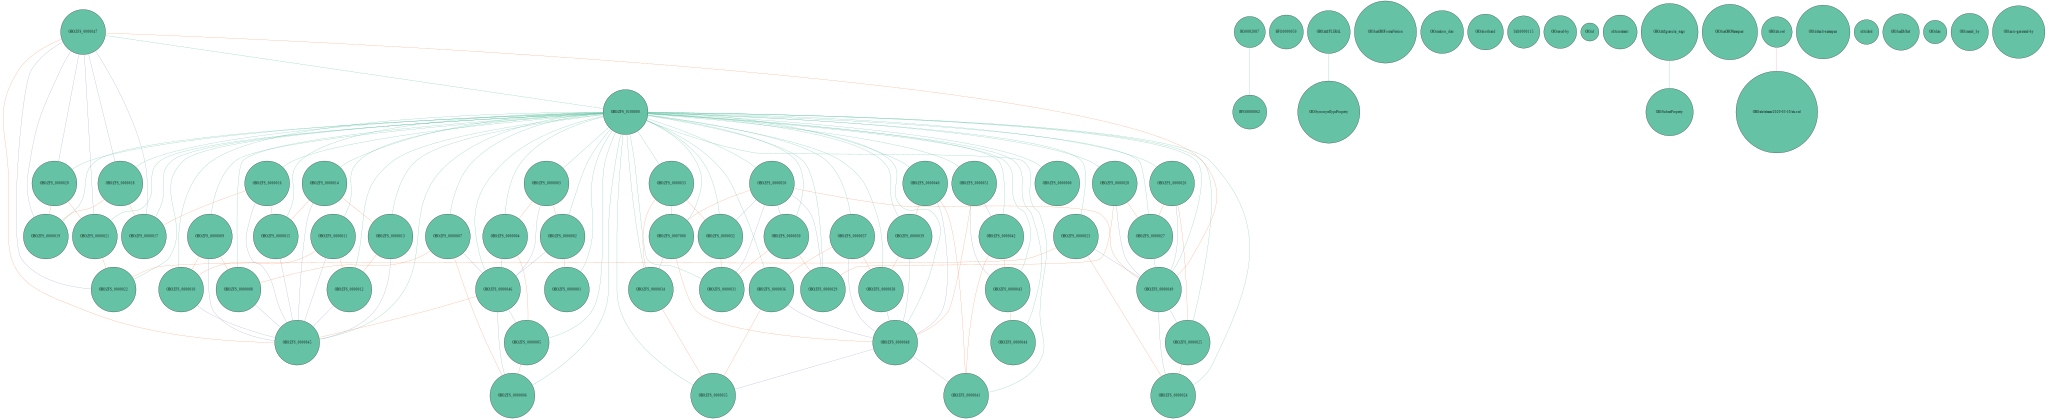

In [21]:
from grape.visualizations import GraphVisualizer

visualizer = GraphVisualizer(graph)
visualizer.plot_dot(engine="dot")

## Compute the graph node embedding

Let's use TransE:

In [22]:
from grape.embedders import TransEEnsmallen

model = TransEEnsmallen()
embedding = model.fit_transform(graph)

/home/luca/anaconda3/lib/python3.9/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:166: UserWarning: Please be advised that the ZFS graph contains 15 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  warnings.warn(


Let's take a look at the node embedding:

In [23]:
embedding.get_node_embedding_from_index(0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
OBO:ZFS_0000047,0.337472,0.035945,-0.159519,-0.043720,0.100558,-0.179307,-0.004260,0.166299,-0.008444,0.077072,...,-0.025269,-0.024693,0.038815,-0.061143,-0.091724,0.078599,-0.082917,-0.164953,0.004628,0.018722
OBO:ZFS_0100000,0.604068,0.002720,0.075411,-0.087670,0.079732,-0.521331,0.088234,-0.122638,0.158635,-0.039027,...,-0.102367,0.120386,-0.005425,0.010858,-0.061239,-0.071797,0.089044,-0.032056,-0.051448,0.001933
OBO:ZFS_0000026,0.089313,0.215493,0.083578,-0.046526,-0.106311,-0.023261,0.241839,0.025979,-0.010485,0.168978,...,-0.055442,-0.114045,0.075020,-0.025065,-0.001077,-0.037194,-0.270782,0.049454,0.086652,0.080362
OBO:ZFS_0000050,-0.145870,0.178668,0.274668,0.035760,-0.129491,0.063887,0.134699,-0.126789,-0.053283,0.076829,...,0.100896,-0.064437,0.050281,0.067776,0.139759,0.051873,-0.069793,0.033216,0.109648,0.203050
OBO:ZFS_0000040,-0.035922,0.108561,0.067159,0.037171,-0.042841,0.017363,-0.018746,-0.098251,0.055315,-0.254210,...,-0.028196,0.026919,0.005483,0.002401,0.038716,-0.040559,0.081879,0.026882,0.133777,-0.014169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rdfs:label,-0.333877,0.323827,0.500511,-0.140782,-0.283670,0.491668,-0.092991,-0.569650,-0.080480,-0.302108,...,0.544844,0.522090,-0.544729,0.191061,-0.174223,0.009331,0.280754,-0.020532,0.279475,0.573758
OIO:hasDbXref,-0.285690,-0.446880,0.466809,-0.055210,-0.541002,-0.256800,-0.204276,0.207912,-0.569034,-0.144371,...,-0.244415,0.322562,-0.522948,0.460622,0.310926,0.371484,0.191094,-0.435971,0.126903,-0.454938
OIO:date,0.331461,0.425261,0.535365,-0.057072,0.321737,0.527981,-0.397869,0.577103,-0.440254,-0.572563,...,-0.152701,0.386688,0.549843,-0.495392,0.326002,-0.057875,0.498005,-0.473571,-0.089911,-0.121154
OIO:created_by,0.455429,-0.309279,0.273370,-0.410727,0.150465,-0.495323,-0.355084,-0.085147,-0.224519,0.032792,...,-0.109143,-0.227827,0.541580,0.087527,-0.310132,-0.423473,0.455682,-0.469205,0.121412,-0.097890


And finally the edge types embedding:

In [24]:
embedding.get_edge_type_embedding_from_index(0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
biolink:subclass_of,0.137219,-0.484660,-0.427501,-0.161797,0.275403,-0.113667,-0.006764,-0.508537,-0.050681,-0.379290,...,-0.102878,0.441965,0.066911,0.196553,-0.006404,0.164642,0.582427,-0.395075,-0.196373,0.433839
biolink:preceded_by,-0.261801,0.358478,0.056144,0.361629,0.047657,0.255787,0.137147,-0.158174,0.517388,-0.476014,...,0.312389,-0.305217,0.107202,-0.019521,0.302601,0.402062,0.065123,-0.151876,0.302379,0.519391
biolink:part_of,-0.167427,-0.368057,-0.252078,-0.136444,0.057202,0.346614,-0.413999,0.010321,0.024874,-0.003727,...,0.514526,-0.207263,-0.272578,0.387351,0.530572,0.093218,-0.142331,0.284848,-0.163842,0.073230
owl:versionIRI,0.550142,0.638593,0.517946,-0.519035,-0.439704,-0.463822,0.801498,-0.012029,-0.205542,0.443372,...,-0.585044,-0.323432,0.588067,-0.358904,-0.235891,-0.344483,-0.440657,-0.390258,-0.160129,0.045022


### Visualizing the computed node embedding
We can use the visualizer, transforming the node embedding using a TSNE, to get a visualization of its node degrees and edge types:

/home/luca/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/luca/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/luca/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/luca/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/luca/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/luca

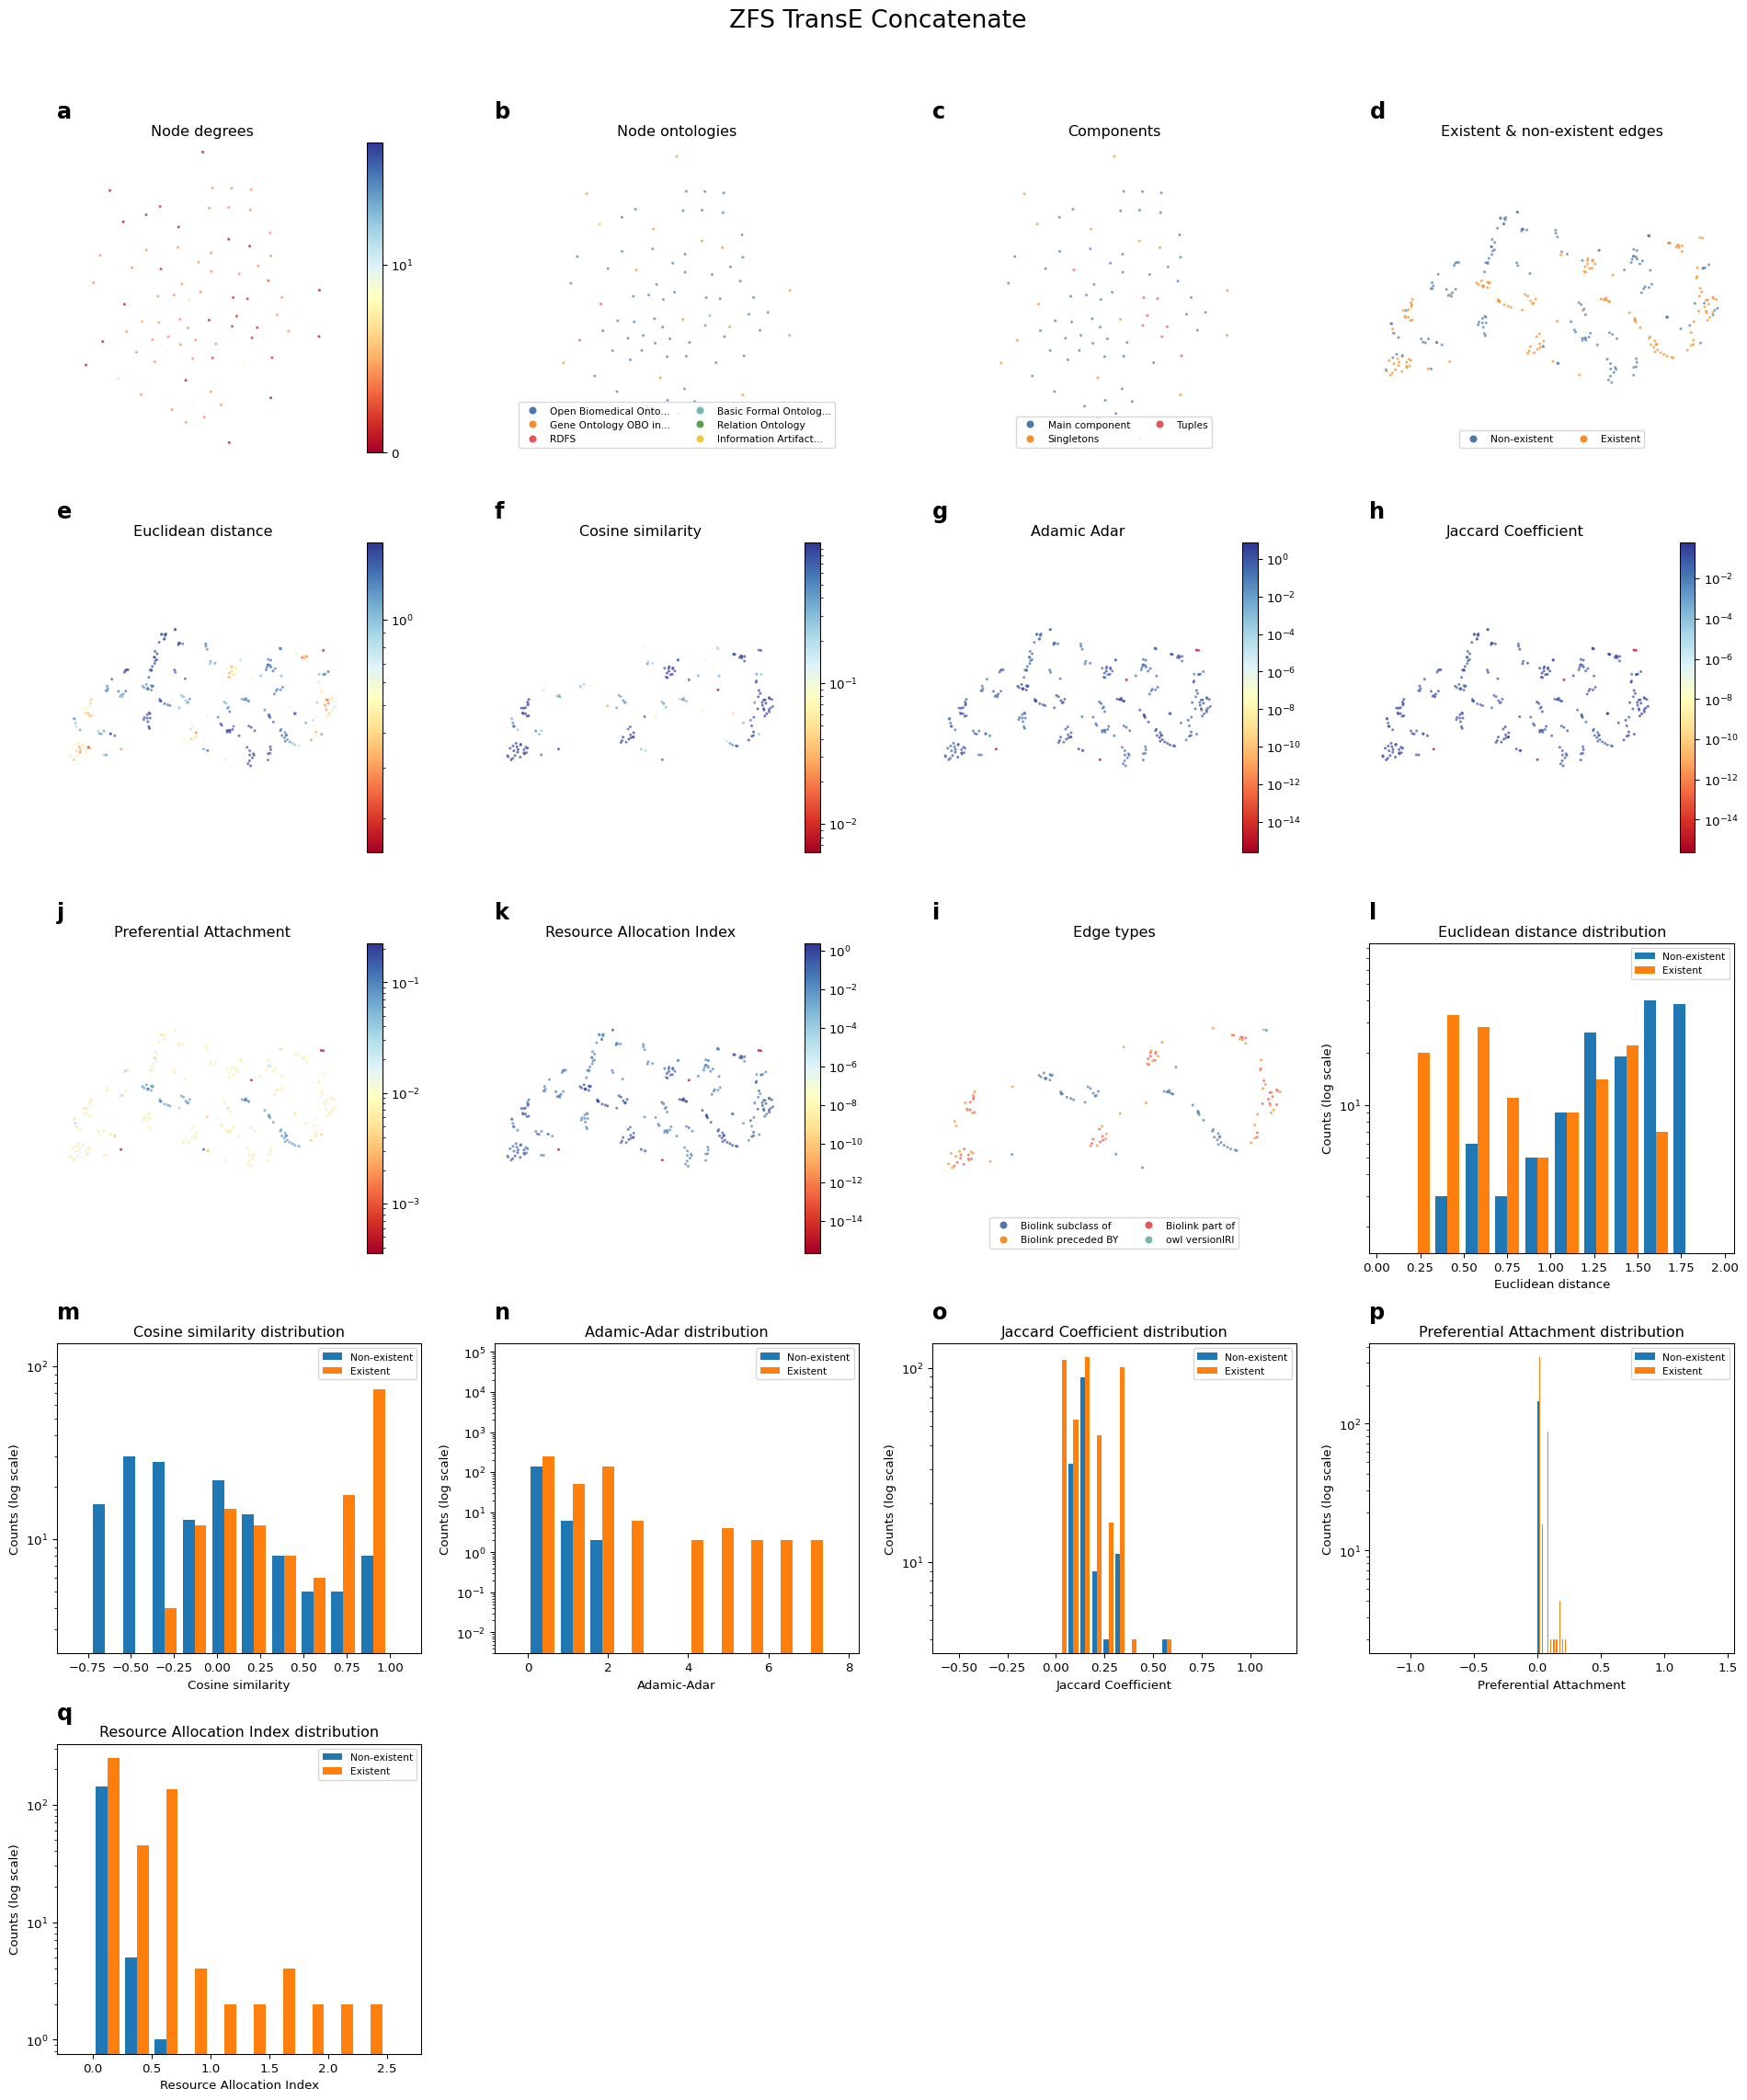

In [25]:
from grape import GraphVisualizer

visualizer = GraphVisualizer(graph)
visualizer.fit_and_plot_all(embedding)

*Would you like this tutorial to include some more sections? Please do let us know [by opening a issue in the GraPE repository](https://github.com/AnacletoLAB/grape/issues/new).*